In [1]:
import sys, os
import numpy as np
import pandas as pd
%matplotlib inline


sys.path.append('/Users/b324115/Library/CloudStorage/Box-Box/critical_phenomena_saxs/allisons_data')

In [2]:
# get list of molecules in 'molecular_properties.csv'

molec_info = pd.read_csv('../data/molecular_properties.csv').sort_values(['mol_class','mol_name'])

molec_info['mol_name'].to_numpy()

array(['ADAAMEH', 'DBP', 'DBTD', 'DOHE', 'T2EHDGA', 'TODGA', 'BUTANOL',
       'ETHANOL', 'HEXANOL', 'METHANOL', 'OCTANOL', 'PROPANOL', 'H2O',
       'ACETONITRILE', 'BENZENE', 'CYCLOHEXANE', 'DECANE', 'DODECANE',
       'HEPTANE', 'HEXANE', 'OCTANE', 'PIPERADINE', 'PYRIDINE',
       'TETRADECANE', 'THF', 'TOLUENE', '[BMIM][BF4]', '[BMIM][CL]',
       '[BMIM][NO3]', '[BMIM][PF6]', '[BMIM][TFSI]', '[BMPIP][TFSI]',
       '[BMPYR][TFSI]', '[BPY][TFSI]', '[EBPIP][TFSI]', '[EMIM][BF4]',
       '[EMIM][CL]', '[EMIM][NO3]', '[EMIM][PF6]', '[EMIM][TFSI]',
       '[EMPIP][TFSI]', '[EMPYR][TFSI]', '[EPY][TFSI]', '[HMIM][BF4]',
       '[HMIM][CL]', '[HMIM][NO3]', '[HMIM][PF6]', '[HMIM][TFSI]',
       '[HMPIP][TFSI]', '[HMPYR][TFSI]', '[HPY][TFSI]', '[OMIM][BF4]',
       '[OMIM][CL]', '[OMIM][NO3]', '[OMIM][PF6]', '[OMIM][TFSI]',
       '[OMPIP][TFSI]', '[OMPYR][TFSI]', '[OPY][TFSI]'], dtype=object)

In [8]:
# starting with a binary system

mols = ['dbp', 'dodecane']

# get list of smiles
mols_upper = [mol.upper() for mol in mols]
smiles = molec_info.set_index('mol_name').loc[mols_upper,:]['smiles'].tolist()
smiles

['CCCCN(C)C(=O)C(C(=O)N(C)CCCC)CCCCC', 'CCCCCCCCCCCC']

In [9]:
from picmol.thermo_model import ThermoModel
from picmol.plotter import PhaseDiagramPlotter

# create thermodynamic model
tmodel = ThermoModel(identifiers=smiles, identifier_type="smiles", 
										 Tmax=400, Tmin=100, dT=10,
										 model_name="unifac")

# run thermodynamic model & calculate scattering
tmodel.analysis()

In [10]:
tmodel.model.subgroups

[{1: 5, 2: 10, 3: 1, 98: 2}, {1: 2, 2: 10}]

In [11]:
# create plotting object
plotter = PhaseDiagramPlotter(tmodel)

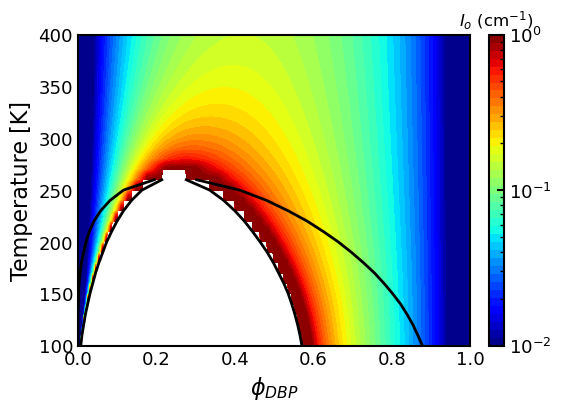

In [12]:
# plot saxs Io
plotter.binary_phase_diagram_I0_heatmap(basis='vol', num_contours=40, show_fig=True)

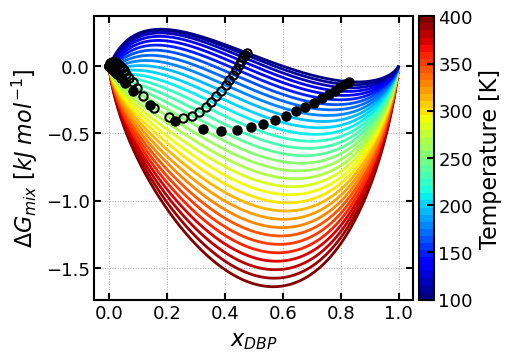

In [13]:
# plot mixing free energy
plotter.binary_gmix(basis='mol', show_fig=True)

In [10]:
# now for a ternary system

mols = ['toluene', 'heptane', '[hmim][tfsi]']

mols_upper = [mol.upper() for mol in mols]
smiles = molec_info.set_index('mol_name').loc[mols_upper,:]['smiles'].tolist()
smiles

['Cc1ccccc1',
 'CCCCCCC',
 'CCCCCCn1cc[n+](C)c1.FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F']

In [11]:
# create thermodyanamic model object
tmodel = ThermoModel(identifiers=smiles, Tmin=100, Tmax=500, dT=100, identifier_type='smiles', model_name='unifac')

# run thermodynamic model & calculate scattering
tmodel.analysis()

In [12]:
# initialize plotter object
plotter = PhaseDiagramPlotter(tmodel)

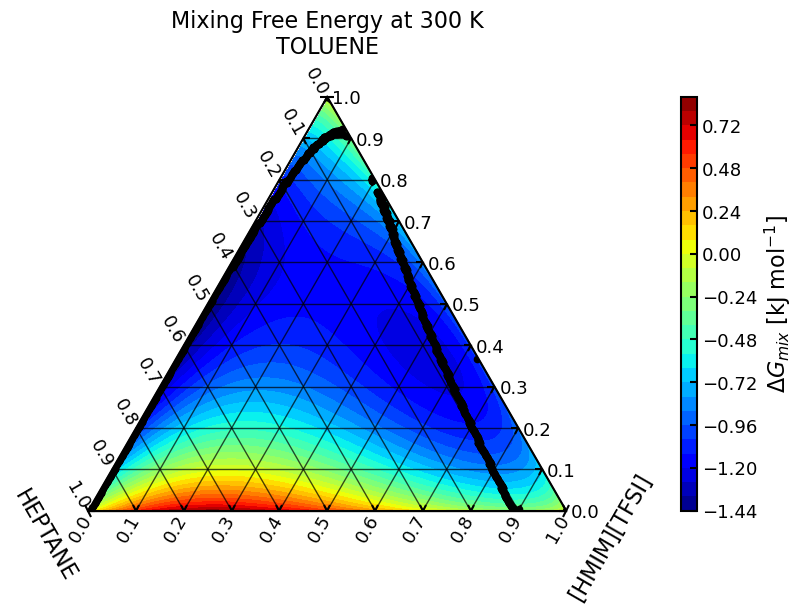

In [13]:
# plot mixing free energy at 300 K with spinodals and binodals
plotter.plot_ternary_spbi(T=300, arr_name="GM", num_contours=30, show_fig=True)

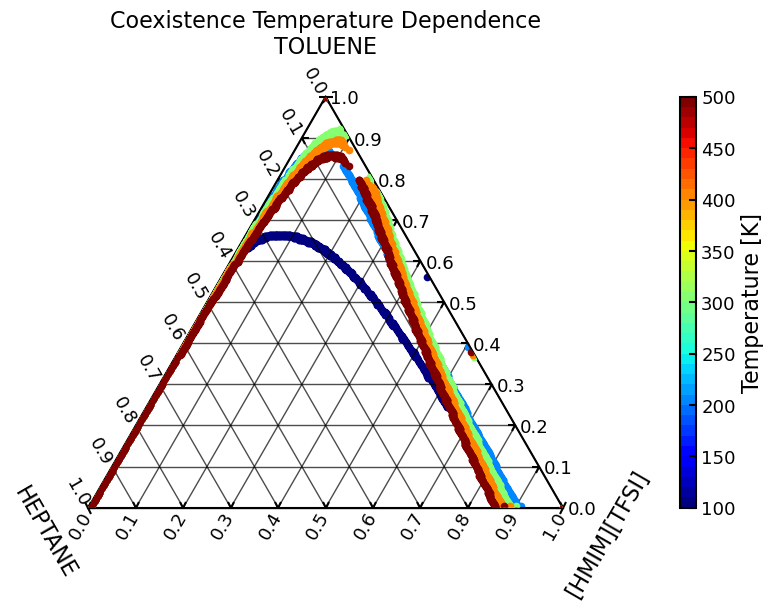

In [14]:
# visualize binodals as a function of temperature
plotter.ternary_binodals_fTemp(show_fig=True)